In [1]:
# Importing the Necessary Libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Reading the Data

data = pd.read_csv(r"C:\Users\guak2001\OneDrive - Nielsen IQ\ML_Learning_projects\Credit card fraud\archive\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# checking Basic shape and summary

print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271

In [4]:
## lets take a look at the Fraud cases
fraud = data[data.Class == 1]
valid = data[data.Class == 0]
outliers = len(fraud)/len(valid)
print(outliers) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


<function matplotlib.pyplot.show(close=None, block=None)>

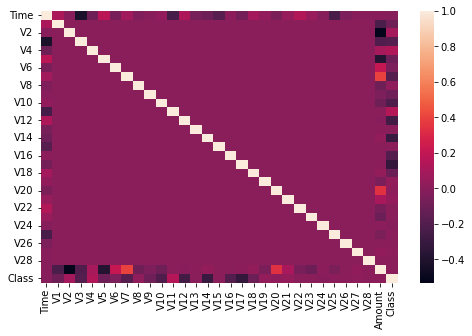

In [5]:
## data is not balanced as Fraud cases are very less
## Lets see how the variables react with each other
corr = data.corr()
fig = plt.figure(figsize=(8,5))
sns.heatmap(corr)
plt.show

In [6]:
## Defining the variables for testing our Model

x = data.drop(['Class'], axis = 1)
y = data['Class']
print(x.shape)
print(y.shape)


(284807, 30)
(284807,)


In [7]:
## Randomly dividing the data into test and train datasets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x= data.iloc[:,:-1]
y = data.iloc[:,-1]

In [8]:
## we will use K fold cross validation to check among multiple models for which one to use
## this is a one time activity once we know which model is best we can just comment this code out
## for example i have used 3 different models over here 


from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

## Define a scoring metric for the K fold\
def cv_scoring(estimator,x,y):
    return accuracy_score(y,estimator.predict(x))

## Initiate the models
models = {'SVC':SVC(),'GaussianNB':GaussianNB(),'RandomForest':RandomForestClassifier(random_state=18)}

## making loop to test all models at once
for model_name in models :
    model = models[model_name]
    score = cross_val_score(model, x, y, cv=5, scoring=cv_scoring, n_jobs=-1)
    
    
    print("=="*30)
    print(model_name)
    print(f'scores:{score}')
    print(f'mean scores:{np.mean(score)}')

SVC
scores:[0.998262   0.998262   0.99827952 0.99827952 0.99827952]
mean scores:0.9982725144432208
GaussianNB
scores:[0.98948422 0.992732   0.99482102 0.99211741 0.99276698]
mean scores:0.9923843253587039
RandomForest
scores:[0.01695867 0.99963133 0.99917487 0.99963133 0.99943821]
mean scores:0.8029668840434425


In [9]:
## Among the three models I am taking Random Forest classifier as its accuracy is the most among almost all folds except one.

random_forest_Model = RandomForestClassifier()
random_forest_Model.fit(x_train,y_train)
preds = random_forest_Model.predict(x_test)


In [10]:
## evaluating the classifier with all the possible scoring params

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,matthews_corrcoef

print('The model used is SVM : ')
print(f'The accuracy score is : {accuracy_score(y_test,preds)}')
print(f'The precision score is : {format(precision_score(y_test,preds,labels=np.unique(preds)))}')
print(f'The Recall score is : {recall_score(y_test,preds)}')
print(f'The f1 score is : {f1_score(y_test,preds)}')
print(f'The Matthews Correlation score is : {matthews_corrcoef(y_test,preds)}')


The model used is SVM : 
The accuracy score is : 0.9995786664794073
The precision score is : 0.9743589743589743
The Recall score is : 0.7755102040816326
The f1 score is : 0.8636363636363635
The Matthews Correlation score is : 0.8690748763736589


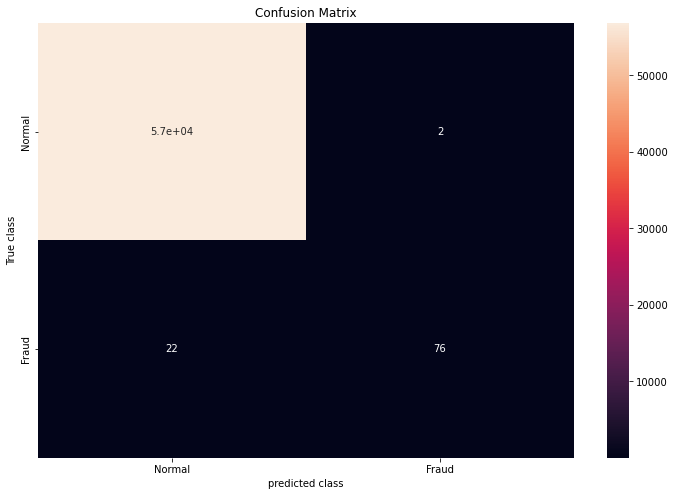

In [11]:
## visualizing the confusion matrix
Labels = ['Normal','Fraud']
conf_matrix = confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix, annot= True,xticklabels= Labels,yticklabels=Labels)
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('predicted class')
plt.show()